In [103]:
import numpy as np
import cv2 as cv
from skimage.morphology import skeletonize
from skimage.feature import hog
import glob
import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from PIL import Image
import imageio
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [28]:
data = pd.read_excel("data.xlsx")

In [92]:
patch_size = 250
df = pd.DataFrame(columns=["year", "x", "y", "integral", "entropy", "sw"])
for a in tqdm.tqdm(glob.glob("skeletons/*.png")):
    im = cv.imread(a, cv.IMREAD_GRAYSCALE)
    heatmap = np.zeros((im.shape[0]//patch_size, im.shape[1]//patch_size))
    ark = a[10:-7]
    year = data[data.ark == "12148_"+ark].date.values[0]
    hog_patches = hog(im, orientations=20, pixels_per_cell=(500, 500), cells_per_block=(2, 2), visualize=False, feature_vector=False)
    for y in range(hog_patches.shape[0]):
        for x in range(hog_patches.shape[1]):
            hog_patch = (hog_patches[y][x][0][0]+hog_patches[y][x][1][0]+hog_patches[y][x][0][1]+hog_patches[y][x][1][1])/4
            integral = np.sum(hog_patch)
            if integral == 0:
                continue
            entropy = stats.entropy(hog_patch)
            sw,_ = stats.shapiro(hog_patch)
            df = df.append({"x":x, "y":y, "year":year, "integral":integral, "sw":sw, "entropy":entropy}, ignore_index=True)

100%|████████████████████████████████████████████████████████████████████████████████| 360/360 [54:49<00:00,  9.14s/it]


In [94]:
df = df.dropna()

In [97]:
bins = np.percentile(df.year.values, range(5,101,5))

In [99]:
def find_bin_id(year):
    bin_id = 0
    while bin_id < len(bins):
        if year <= bins[bin_id]:
            return bin_id
        bin_id += 1
    return None

In [100]:
df["bins"] = df.year.apply(find_bin_id)

<AxesSubplot:xlabel='bins', ylabel='sw'>

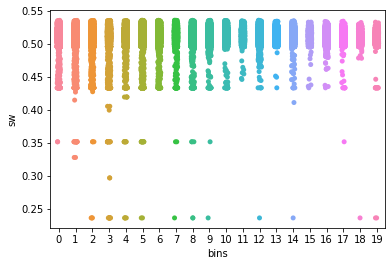

In [109]:
sns.stripplot(data=df, x="bins", y="sw", jitter=1)

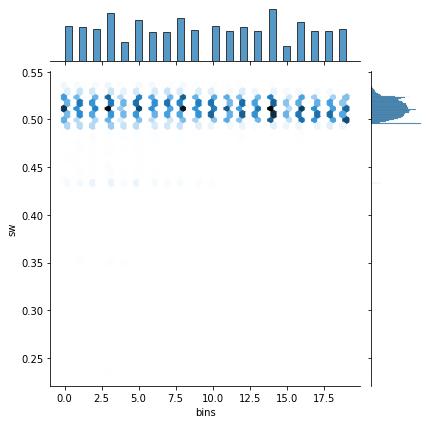

In [112]:
sns.jointplot(data=df,x="bins",y="sw", kind="hex")

In [114]:
df.bins.value_counts()

14    5714
3     5245
8     4662
5     4512
16    4243
10    3863
0     3860
1     3690
12    3674
19    3509
2     3472
9     3358
17    3322
13    3268
18    3253
11    3231
6     3195
7     3187
4     2041
15    1587
Name: bins, dtype: int64